In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import models.ssmrk as ssmrk
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
# Parameters
abbr = "S30"


In [3]:
preprocess(abbr)
ssmrk_df, pentzer_df = ssmrk.ssmrk_main(abbr)


S30 : Exported merged CSV in data/runs/S30/elec/S30_2022-08-12-17-16-02-AG-LinTrottoirGrandAxe_elec_motor_data.csv
Primary topic : mcu_status
S30 : Exported merged CSV in data/runs/S30/merged/S30_2022-08-12-17-16-02-AG-LinTrottoirGrandAxe_m.csv
S30 : Exported cut CSV in data/runs/S30/merged/S30_2022-08-12-17-16-02-AG-LinTrottoirGrandAxe_mc.csv
Constant columns : 19
['/mcu/status/current_48v', '/warthog_velocity_controller/odom/ang_twi/x', '/warthog_velocity_controller/odom/ang_twi/y', '/warthog_velocity_controller/odom/lin_twi/y', '/warthog_velocity_controller/odom/lin_twi/z', '/warthog_velocity_controller/odom/orientation/pitch', '/warthog_velocity_controller/odom/orientation/roll', '/warthog_velocity_controller/odom/orientation/x', '/warthog_velocity_controller/odom/orientation/y', '/warthog_velocity_controller/odom/position/z', '/imu_and_wheel_odom/ang_twi/x', '/imu_and_wheel_odom/ang_twi/y', '/imu_and_wheel_odom/ang_twi/z', '/imu_and_wheel_odom/lin_twi/y', '/imu_and_wheel_odom/lin_

```
axlim = 25
fig, ax = plt.subplots()
ssmrk_df["ICRyL"].plot(ax=ax)
ssmrk_df["ICRyR"].plot(ax=ax)
ax.set_ylim(bottom=-axlim, top=axlim)
```

In [4]:
print(ssmrk_df.columns.values)


['time' 'time_rel' 'vx' 'vy' 'vz' 'w_z' 'current' 'voltage' 'ax' 'ay' 'az'
 'theta' 'qw' 'qx' 'qy' 'qz' 'cmd_v' 'cmd_w' 'wL' 'wR' 'px' 'py' 'pz'
 'I_L' 'I_R' 'V_L' 'V_R' 'ax_corr' 'ay_corr' 'az_corr' 'P_total' 'v' 'a'
 'P_motion' 'ICRx' 'ICRy' 'vL' 'vR' 'ICRyL' 'ICRyR' 'normal_force' 'Bs'
 'dx_front' 'dx_rear' 'dy_left' 'dy_right' 'd_fl' 'd_fr' 'd_rl' 'd_rr'
 'dist_asym' 'dist_sym' 'JS_asym' 'JS_sym' 'JG' 'JB' 'mu_asym' 'G_asym'
 'B_asym' 'mu_sym' 'G_sym' 'B_sym']


(-10.0, 10.0)

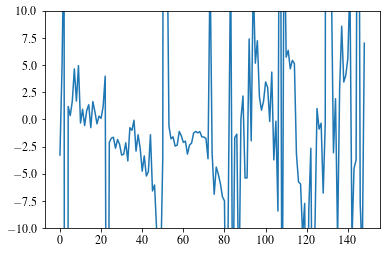

In [5]:
axlim = 10
fig, ax = plt.subplots()
(ssmrk_df.ICRyL - ssmrk_df.ICRyR).plot(ax=ax)
ax.set_ylim(bottom=-axlim, top=axlim)


In [6]:
mask = ssmrk_df.index >= 10

index = ssmrk_df.index[mask]
power = ssmrk_df.P_total[mask]

mu_asym = ssmrk_df.mu_asym[mask]
G_asym = ssmrk_df.G_asym[mask]
B_asym = ssmrk_df.B_asym[mask]

mu_sym = ssmrk_df.mu_sym[mask]
G_sym = ssmrk_df.G_sym[mask]
B_sym = ssmrk_df.B_sym[mask]


In [7]:
basename = u.get_basename(u.get_filename(abbr))
figdir = u.get_figdir(basename)
ssmrkgifs = figdir / "ssmrk"
# pentzfigs = ssmrkgifs / "ssmr_pentz"

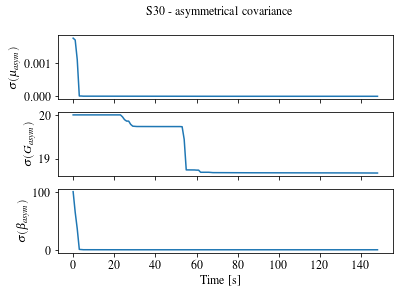

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(sharex=True, nrows=3)
pentzer_df.pentz_asym_covm.plot(ax=ax1)
pentzer_df.pentz_asym_covG.plot(ax=ax2)
pentzer_df.pentz_asym_covB.plot(ax=ax3)

ax1.set_ylabel("$\sigma({\mu}_{asym})$")
ax2.set_ylabel("$\sigma({G}_{asym})$")
ax3.set_ylabel("$\sigma({\\beta}_{asym})$")

fig.suptitle(f"{abbr} - asymmetrical covariance")

fig.supxlabel("Time [s]")

fig.savefig(ssmrkgifs / f"{abbr}_covasym.jpg", bbox_inches="tight")


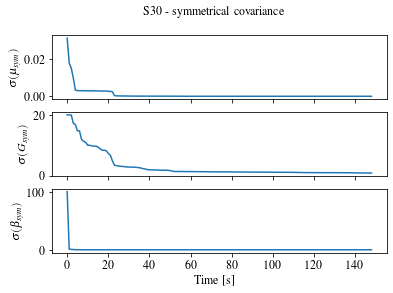

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(sharex=True, nrows=3)
pentzer_df.pentz_sym_covm.plot(ax=ax1)
pentzer_df.pentz_sym_covG.plot(ax=ax2)
pentzer_df.pentz_sym_covB.plot(ax=ax3)

ax1.set_ylabel("$\sigma({\mu}_{sym})$")
ax2.set_ylabel("$\sigma({G}_{sym})$")
ax3.set_ylabel("$\sigma({\\beta}_{sym})$")

fig.suptitle(f"{abbr} - symmetrical covariance")

fig.supxlabel("Time [s]")

fig.savefig(ssmrkgifs / f"{abbr}_covsym.jpg", bbox_inches="tight")